# <p style="padding:10px;background-color:#008080;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> K-Nearest Neighbors (KNN)</p>

<p style="text-align:center; ">
<img src="https://th.bing.com/th/id/R.5680ba7394c320efaa16adfe9b5a1cf2?rik=6y4BP3dnfrmuvA&riu=http%3a%2f%2fwww.datasciencelovers.com%2fwp-content%2fuploads%2f2020%2f03%2fk-nearest-neighbor2.png&ehk=VprLSRTXghhpziYSxSXqAkCDmoZSLarGS26xo9F2GmY%3d&risl=&pid=ImgRaw&r=0" style='width: 500px; height: 350px;'>
</p>

**<span style='color:#008080'>K-Nearest Neighbors (KNN)</span>** is a non-parametric algorithm, does't make any assumptions about the underlying data distribution, that classifies new data points based on their proximity to the nearest neighbors in the training data.
It calculates the distance between one point to another, then assign the label of unobserved data based on the labels of nearest observed data points.
    
The “K” in KNN is a parameter that refers to the number of nearest neighbors to include in the majority of the voting process.

</p> 

**<span style='color:#008080'>KNN common hyperparameters</span>**: n_neighbors, weights, leaf_size, p

[More about KNN | IBM](https://www.ibm.com/topics/knn).


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette("Spectral")

In [3]:
df = pd.read_csv(r"C:\Users\tawfi\Downloads\data\DataSetKNN.csv")
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [39]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


<div style="color:white;
            display:fill;
            border-radius:15px ;
            background-color:#79d2a6;
            font-size:170%;
            font-weight:500;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
      Data Review
    </h3>
    </div>
    

In [8]:
def data_review(df):
    
    # shape of data
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns . \n")

    # check about missing values
    print("\n" + 10 * "-" + "Missing Values".center(20) + 10 * "-"+"\n")
    print(df.isna().sum()/len(df))
    print(f"\nthe number of all missing values in data equal : { df.isna().sum().sum()}")
    
    # check about duplicated rows
    print(f"\nthere are {df.duplicated().sum()} duplicated rows")
    

In [9]:
data_review(df)

Dataset has 1000 rows and 11 columns . 


----------   Missing Values   ----------

XVPM            0.0
GWYH            0.0
TRAT            0.0
TLLZ            0.0
IGGA            0.0
HYKR            0.0
EDFS            0.0
GUUB            0.0
MGJM            0.0
JHZC            0.0
TARGET CLASS    0.0
dtype: float64

the number of all missing values in data equal : 0

there are 0 duplicated rows


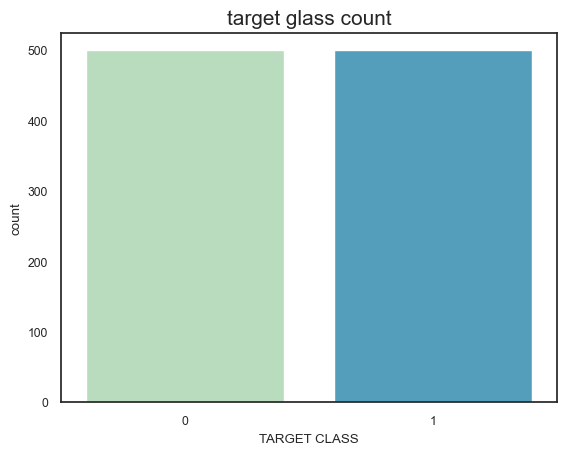

In [28]:
sns.countplot(data=df, x='TARGET CLASS',palette='GnBu')
plt.title("target glass count", fontsize=15);

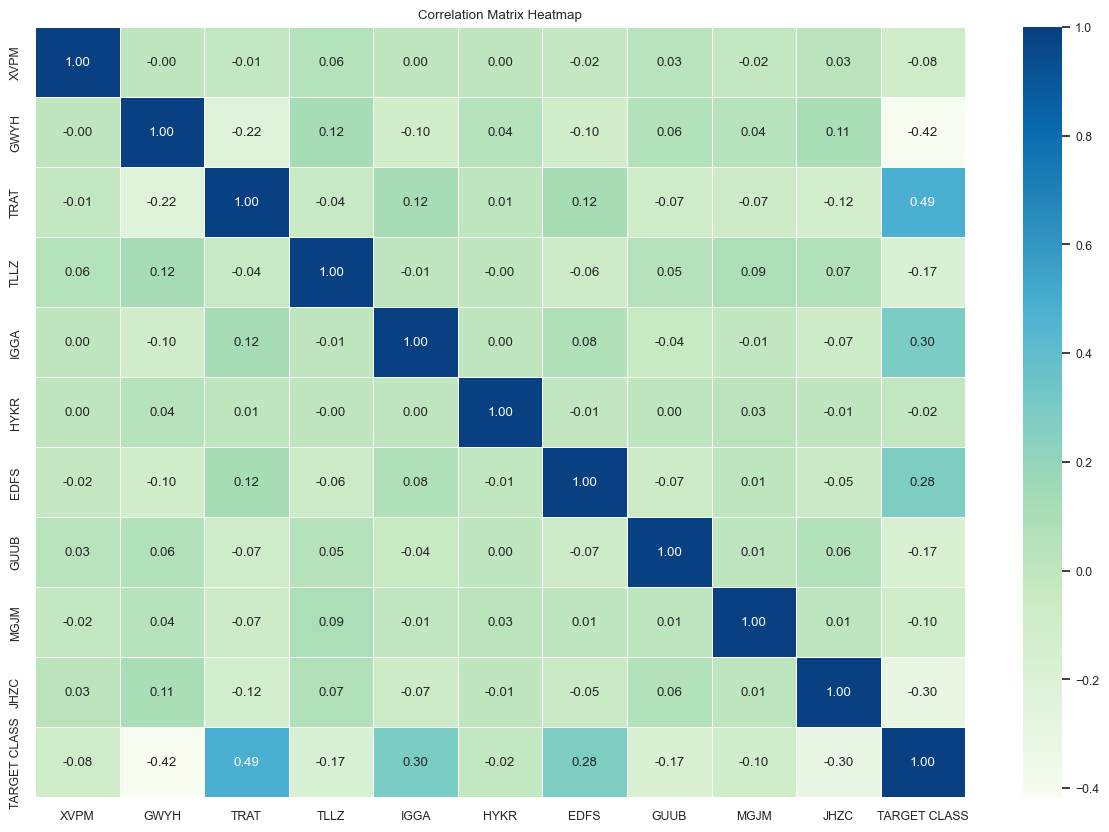

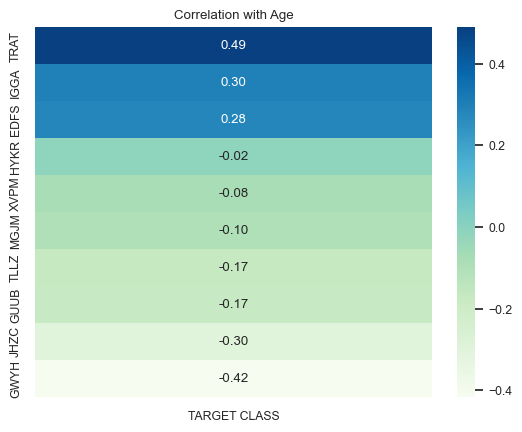

In [51]:
# Compute the correlation matrix
correlation_matrix = df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['TARGET CLASS'].drop('TARGET CLASS')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), cmap="GnBu", annot=True, fmt='.2f')
plt.title('Correlation with Age')
plt.show()

There are no missing values and duplicated rows so
**Data is cleaned and preprocessed.**

## <b><span style='color:#008080'>|</span> Observations </b> 

Data doesn't have any missing values and duplicated rows. Target column is balanced.

So, data is cleaned and processed.


<div style="color:white;
            display:fill;
            border-radius:15px ;
            background-color:#79d2a6;
            font-size:170%;
            font-weight:500;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
      Model Building
    </h3>
    </div>
    

# <b>I <span style='color:#008080'>|</span> Spliting data </b> 

In [35]:
# split data vertically

target= 'TARGET CLASS'
X= df.drop(columns=target)
y = df[target]

In [36]:
# split data horizontally

X_train, X_test, y_train, y_test = train_test_split(
    X , y ,
    test_size=0.2,
    random_state=42
)

In [37]:
# display results

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 10)
y_train shape: (800,)
X_test shape: (200, 10)
y_test shape: (200,)


# <b>II <span style='color:#008080'>|</span> Rescaling a Feature:</b> 

I prepare x_data and y_data and I will rescale x_data. The reason I do rescaling is that the values do not match with each other, so the number 31.8 and the number 3180 are not in the same range, I will reduce these numbers to the same range. My range will be 0-1.

#### **<mark style="background-color:#008080;color:white;border-radius:5px;opacity:1.0">What's rescaling feature?</mark>**

In machine learning, rescaling is a frequent pre-processing step. One of the simplest methods of rescaling is known as **<span style='color:#008080'>min-max scaling</span>**. A feature’s minimum and maximum values are used to rescale data to fit inside a predetermined range when using min-max scaling.

<p class="formulaDsp">
\[ X' = \frac{x_i - \min({x_i})}{\max({x_i})-\min({x_i})} \]
</p>

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like **support vector machines (SVM)** or **k-nearest neighbors (KNN)**. With these algorithms, a change of "1" in any numeric feature is given the same importance.

<br>
<div style="border-radius:10px;border:#008080 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
min-max scaling gives accurate results when the standard deviation is low and when the distribution does not follow the Gaussian model. This strategy is quite sensitive to data that contains outliers.
</div>

In [40]:
# rescaling X_train dataset
X_train = (X_train - np.min(X_train))/(np.max(X_train) - np.min(X_train)).values

# rescaling X_test dataset
X_test = (X_test - np.min(X_test))/(np.max(X_test) - np.min(X_test)).values

X_train.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
29,0.719289,0.495017,0.110813,0.540843,0.338572,0.645647,0.362933,0.274434,0.343095,0.354862
535,0.758345,0.340205,0.586111,0.477135,0.434642,0.686200,0.451946,0.127283,0.609979,0.159196
695,0.720254,0.805823,0.395558,0.647526,0.639798,0.429884,0.529289,0.257752,0.169985,0.433830
557,0.339489,0.522096,0.667263,0.338441,0.745696,0.810304,0.728217,0.318767,0.322769,0.506735
836,0.523585,0.526522,0.391536,0.657240,0.678778,0.464423,0.601002,0.051285,0.512673,0.747739


# <b>III <span style='color:#008080'>|</span> Training model</b> 


In [ ]:
# to find which value shows the lowest mean error
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [50]:
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Train the model using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
prediction = knn.predict(X_test)

print("knn score: {}".format(knn.score(X_test, y_test)))

knn score: 0.8


# **<span style='color:#008080'>Confusion Matrix</span>**

**<mark style="color:#008080;border-radius:5px;opacity:1.0">Confusion matrix</mark>** is a table that summarize the performance of classification models by compared the actual values with predicted values.

**It shows:**

**<span style='color:#008080'>True Posetive(TP):</span>** correctly prediction as a positive (belong to positive class and predicted as positive)

**<span style='color:#008080'>False Positive(FP):</span>** incorrectly prediction as a positive (belong to negative class but predicted as positive)

**<span style='color:#008080'>False Negative(FN):</span>** incorrectly prediction as a negative (belong to positive class but predicted as negative)

**<span style='color:#008080'>True Negative(TN):</span>** correctly prediction as a negative (belong to negative class and predicted as negative)

<br>

<div style="border-radius:10px;border:#008080 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
note: A good model is one which has high True Posetive(TP) and True Negative(TN) rates
</div>


#### **<mark style="background-color:#008080;color:white;border-radius:5px;opacity:1.0">Precision</mark>**

Precision is a measure of how many of the true positive predictions were actually correct. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false positives (FP).

* Precision is a useful matrix when FP is a higher concern than FN.

<p class="formulaDsp">
\[ Precision = \frac{TP}{TP + FP} \]
</p>

#### **<mark style="background-color:#008080;color:white;border-radius:5px;opacity:1.0">Recall</mark>**


Recall (or Sensitivity) is a measure of how many of the actual positive cases were identified correctly. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false negatives (FN).

* Recall is important when minimizing FN is more critical than minimizing FP.

<p class="formulaDsp">
\[ Recall = \frac{TP}{TP + FN} \]
</p>

#### **<mark style="background-color:#008080;color:white;border-radius:5px;opacity:1.0">F1-Score</mark>**


The F1 score is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall. It is defined as 2 times the product of precision and recall divided by the sum of precision and recall.

* F1-Score is important when the poth precision and recall are equally important and it helps to find a trade-off between recall and precision.

<p class="formulaDsp">
\[ F1 Score = \frac{2 * Precision * Recall}{Precision + Recall} \]
</p>


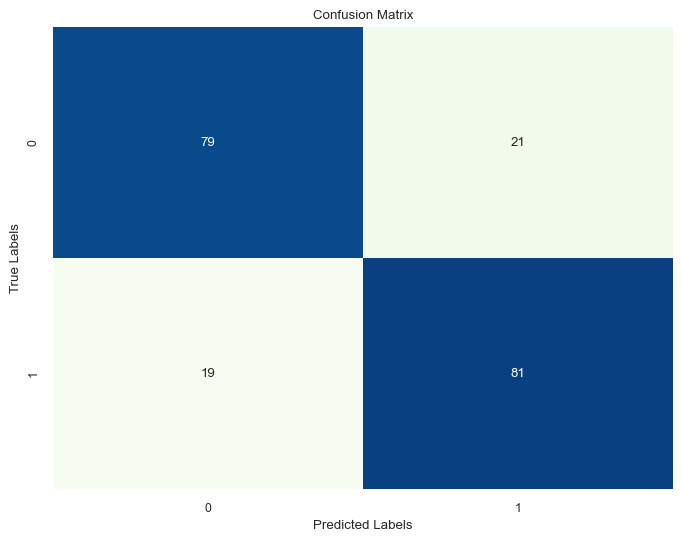

In [52]:
# Create a confusion matrix
cm = confusion_matrix(y_test,prediction)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="GnBu", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Number of neighbors to use by default is 5. The score of 5 neighbors is 0.8 . we will use hyperparameter tuning to increase score, performance and try to select the best k value.

so, let's go. 

# <b>IV <span style='color:#008080'>|</span> hyperparameter tuning</b> 

This code performs the k-nearest neighbors (KNN) classification algorithm, using different values of k (number of neighbors) to evaluate and compare the performance on both the training and test data.

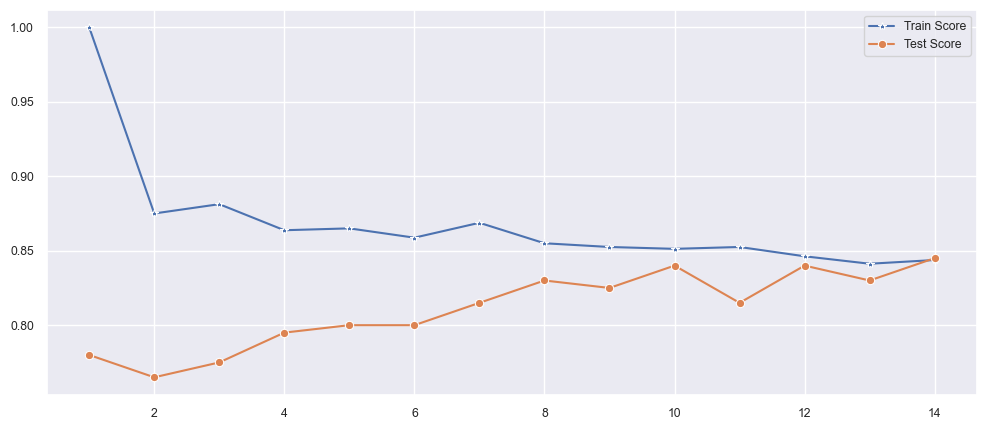

In [53]:
test_score_list = []
train_score_list = []

for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    test_score_list.append(knn2.score(X_test, y_test))
    train_score_list.append(knn2.score(X_train, y_train))
    
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_score_list,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_score_list,marker='o',label='Test Score')

* to see the best parameter of n_neighbors, we use the GridSearchCV model to see the best parameter of n_neighbors.



In [55]:
param_grid = {'n_neighbors':np.arange(1,50)}

knn3 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn3,param_grid,cv=5)
knn_cv.fit(X_test,y_test)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.835
Best Parameters: {'n_neighbors': 22}


#### By tuning the k value we are getting k=22 and score 0.835 it's better than model which trained by default. we will build the model using a new value of neighbors.



In [57]:
final_model = KNeighborsClassifier(n_neighbors=22)

#Train the model
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred=final_model.predict(X_test)


In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a classification report
report = classification_report(y_test, y_pred)




# Print evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))
print()

# Print classification report
print("Classification Report:\n", report)

Accuracy: 0.8450
Precision: 0.8453
Recall: 0.8450
F1-score: 0.8450

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       100
           1       0.83      0.86      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<br>
<br>


<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
Now we have reached the conclusion, I hope you find this useful and learned if something simple. If that don't forget to put feedback and upvote.
    </span>
</div>
